In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import re

# for data cleaning
import string

# import all the necessary libraries
import warnings

#for Tokenization
import nltk

#for Wordscloud
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import sent_tokenize, word_tokenize

#Ignoring unnecessory warnings
warnings.filterwarnings("ignore")                   

# for stopwords Removal
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# for removing accented and special chracters
import plotly.express as px
import unicodedata
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier              #for data manipulation and analysis 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score , f1_score , classification_report , roc_curve , auc , roc_auc_score , zero_one_loss
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('train.csv')
data.head()

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845


In [3]:
data.isnull().sum()

id                   0
url_legal         2004
license           2004
excerpt              0
target               0
standard_error       0
dtype: int64

In [4]:
data.shape

(2834, 6)

In [5]:
data.drop(['url_legal', 'license'], axis=1, inplace=True)
data.head()

,id,excerpt,target,standard_error
0,c12129c31,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,Once upon a time there were Three Bears who li...,0.247197,0.510845


In [6]:
import nltk

In [7]:
stop_words = nltk.corpus.stopwords.words("english")

def preprocess(text):
    # removal of extra spaces
    regex_pat = re.compile(r'\s+')
    text = text.str.replace(regex_pat, ' ')
    
    # removal of punctuations and numbers
    punc_remove = text.str.replace("[^a-zA-Z]", " ")
    
    # remove whitespace with a single space
    new_text=punc_remove.str.replace(r'\s+', ' ')
    
    # remove leading and trailing whitespace
    new_text=new_text.str.replace(r'^\s+|\s+?$','')
    
    # replace normal numbers with numbr
    new_text=new_text.str.replace(r'\d+(\.\d+)?','numbr')
    
    # removal of capitalization
    text_lower = new_text.str.lower()
    
    # tokenizing
    tokenized_text = text_lower.apply(lambda x: x.split())
    
    # removal of stopwords
    tokenized_text=  tokenized_text.apply(lambda x: [item for item in x if item not in stop_words])
    
    for i in range(len(tokenized_text)):
        tokenized_text[i] = ' '.join(tokenized_text[i])
        texts_p= tokenized_text
    
    return texts_p

In [9]:
#data['excerpt'] = data['excerpt'].apply(preprocess)
text = data.excerpt
preprocessed_text = preprocess(text)

data['preprocessed_excerpt'] = preprocessed_text

print(data['excerpt'][0])
print('')
print(data['preprocessed_excerpt'][0])

When the young people returned to the ballroom, it presented a decidedly changed appearance. Instead of an interior scene, it was a winter landscape.
The floor was covered with snow-white canvas, not laid on smoothly, but rumpled over bumps and hillocks, like a real snow field. The numerous palms and evergreens that had decorated the room, were powdered with flour and strewn with tufts of cotton, like snow. Also diamond dust had been lightly sprinkled on them, and glittering crystal icicles hung from the branches.
At each end of the room, on the wall, hung a beautiful bear-skin rug.
These rugs were for prizes, one for the girls and one for the boys. And this was the game.
The girls were gathered at one end of the room and the boys at the other, and one end was called the North Pole, and the other the South Pole. Each player was given a small flag which they were to plant on reaching the Pole.
This would have been an easy matter, but each traveller was obliged to wear snowshoes.

young 

In [10]:
data.describe()

,target,standard_error
count,2834.000000,2834.000000
mean,-0.959319,0.491435
std,1.033579,0.034818
min,-3.676268,0.000000
25%,-1.690320,0.468543
50%,-0.912190,0.484721
75%,-0.202540,0.506268
max,1.711390,0.649671


In [11]:
data['length'] = data['preprocessed_excerpt'].apply(len)

data.head()

,id,excerpt,target,standard_error,preprocessed_excerpt,length
0,c12129c31,When the young people returned to the ballroom...,-0.340259,0.464009,young people returned ballroom presented decid...,606
1,85aa80a4c,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805,dinner time mrs fayre somewhat silent eyes res...,555
2,b69ac6792,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676,roger predicted snow departed quickly came two...,529
3,dd1000b26,And outside before the palace a great garden w...,-1.054013,0.450007,outside palace great garden walled round fille...,588
4,37c1b32fb,Once upon a time there were Three Bears who li...,0.247197,0.510845,upon time three bears lived together house woo...,414


In [16]:
pip install textblob

     -------------------------------------- 636.8/636.8 kB 2.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [17]:
from textblob import TextBlob

In [18]:
def get_polarity(text):
    textblob = TextBlob(str(text.encode('utf-8')))
    pol = textblob.sentiment.polarity
    return pol

data['polarity'] = data['preprocessed_excerpt'].apply(get_polarity)
data.head()

,id,excerpt,target,standard_error,preprocessed_excerpt,length,polarity
0,c12129c31,When the young people returned to the ballroom...,-0.340259,0.464009,young people returned ballroom presented decid...,606,0.173333
1,85aa80a4c,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805,dinner time mrs fayre somewhat silent eyes res...,555,0.093770
2,b69ac6792,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676,roger predicted snow departed quickly came two...,529,0.011064
3,dd1000b26,And outside before the palace a great garden w...,-1.054013,0.450007,outside palace great garden walled round fille...,588,0.351441
4,37c1b32fb,Once upon a time there were Three Bears who li...,0.247197,0.510845,upon time three bears lived together house woo...,414,0.168534


In [19]:
# Lets calculate the Subjectvity of the Reviews
def get_subjectivity(text):
    textblob = TextBlob(str(text.encode('utf-8')))
    subj = textblob.sentiment.subjectivity
    return subj

# lets apply the Function
data['subjectivity'] = data['preprocessed_excerpt'].apply(get_subjectivity)
data.head()

,id,excerpt,target,standard_error,preprocessed_excerpt,length,polarity,subjectivity
0,c12129c31,When the young people returned to the ballroom...,-0.340259,0.464009,young people returned ballroom presented decid...,606,0.173333,0.503333
1,85aa80a4c,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805,dinner time mrs fayre somewhat silent eyes res...,555,0.093770,0.548862
2,b69ac6792,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676,roger predicted snow departed quickly came two...,529,0.011064,0.506443
3,dd1000b26,And outside before the palace a great garden w...,-1.054013,0.450007,outside palace great garden walled round fille...,588,0.351441,0.643860
4,37c1b32fb,Once upon a time there were Three Bears who li...,0.247197,0.510845,upon time three bears lived together house woo...,414,0.168534,0.481034


In [20]:
data[['length','polarity','subjectivity']].describe().style.background_gradient(cmap = 'copper')

,length,polarity,subjectivity
count,2834.000000,2834.000000,2834.000000
mean,609.168313,0.099746,0.464646
std,114.780391,0.121969,0.114601
min,301.000000,-0.550000,0.058333
25%,526.000000,0.022957,0.390956
50%,599.000000,0.093750,0.464940
75%,685.000000,0.173333,0.541667
max,1050.000000,0.630000,0.905000


In [21]:
# Creating bag of words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=30000)

X = cv.fit_transform(data['preprocessed_excerpt']).toarray()
y = data.target

In [22]:
# Feature Scaling
sc = StandardScaler()
X = sc.fit_transform(X)

In [23]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print(X_train.shape , X_test.shape)

(2125, 26065) (709, 26065)


In [24]:
#Fitting Linear Regression to the data set
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [25]:
lin_reg.score(X_test, y_test)

0.3932365288358636

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(data['preprocessed_excerpt'] )

In [28]:
matrix = pd.DataFrame(tfidf.toarray())
matrix

,0,1,2,3,4,5,6,7,8,9,...,26055,26056,26057,26058,26059,26060,26061,26062,26063,26064
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2829,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# If you don't specify the random_state in the code, 
# then every time you run(execute) your code a new random value is generated 
# and the train and test datasets would have different values each time.
X = tfidf
y = data.target
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.25)

print("Training split input- ", X_train_tfidf.shape)   # X FOR INPUT
print("Testing split input- ", X_test_tfidf.shape)

print("\n\nY : Training split input- ", y_train.shape) # Y FOR TARGET.
print("Y : Testing split input- ", y_test.shape)

Training split input-  (2125, 26065)
Testing split input-  (709, 26065)


Y : Training split input-  (2125,)
Y : Testing split input-  (709,)


In [31]:
#Fitting Linear Regression to the data set
lin_reg = LinearRegression()
lin_reg.fit(X_train_tfidf,y_train)

pred = lin_reg.predict(X_test_tfidf)

In [32]:
lin_reg .score(X_test_tfidf, y_test)

0.45184872506934004

In [33]:
np.sqrt(mean_squared_error(y_test , pred))

0.7580568498539841

In [36]:
pip install wordcloud

     ------------------------------------ 300.0/300.0 kB 562.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [37]:
from wordcloud import WordCloud

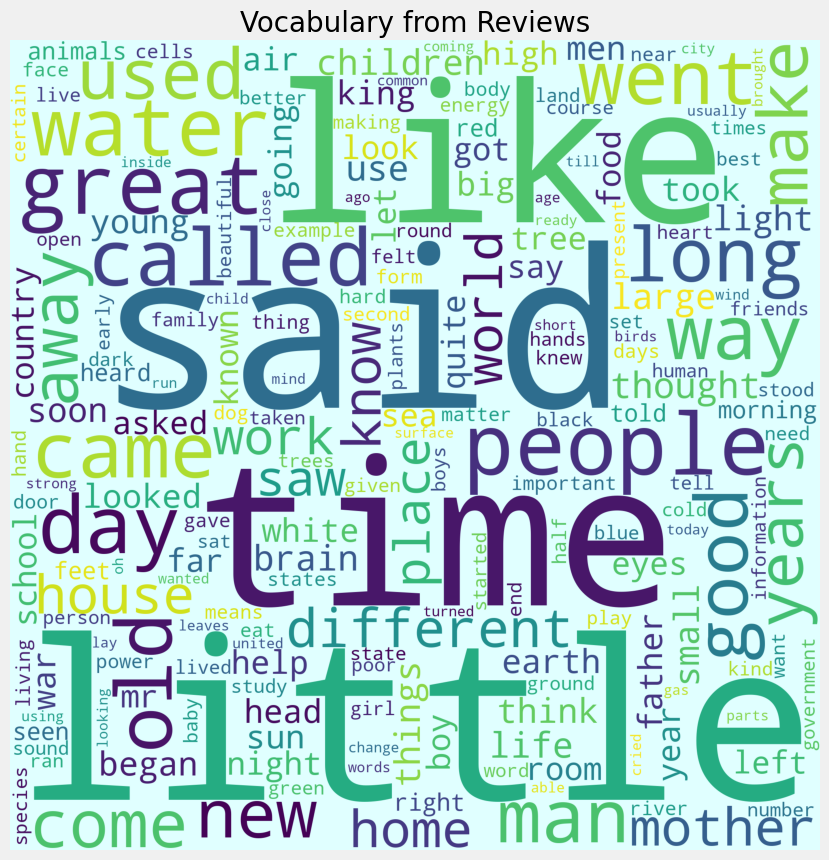

In [38]:
# lets plot the Wordscloud

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data['preprocessed_excerpt'])
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

wordcloud = WordCloud(background_color = 'lightcyan', width = 2000, height = 2000).generate_from_frequencies(dict(words_freq))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Vocabulary from Reviews", fontsize = 20)
plt.show()